### Installing and Importing the required packages

In [1]:
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline
from pylab import rcParams
import missingno as msno

## General Tools
import os
import re
import joblib
import json
import warnings


# sklearn library
import sklearn

### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder


# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


### Machine learning classification Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
#import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier


#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
#from sklearn.metrics import plot_confusion_matrix


#hyper parameter tunning
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV

### Data preprocessing and Feature engineering

In [3]:
df = pd.read_csv("passenger_data.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
input_cols = list(df.iloc[:, :-1])
target_cols = "satisfaction"

In [5]:
pd.options.display.max_columns=30

In [6]:
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True, dtype="int")

In [7]:
df["Customer Type"]= pd.get_dummies(df["Customer Type"], drop_first=True, dtype="int")

In [8]:
df["Type of Travel"]= pd.get_dummies(df["Type of Travel"], drop_first=True, dtype="int")

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df["Class"]=le.fit_transform(df["Class"])

In [12]:
df["Class"]

0         2
1         0
2         0
3         0
4         0
         ..
103899    1
103900    0
103901    0
103902    1
103903    0
Name: Class, Length: 103904, dtype: int32

In [13]:
df["Arrival Delay in Minutes"]

0         18.0
1          6.0
2          0.0
3          9.0
4          0.0
          ... 
103899     0.0
103900     0.0
103901    14.0
103902     0.0
103903     0.0
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
median=df["Arrival Delay in Minutes"].median()

In [16]:
df["Arrival Delay in Minutes"].fillna(median, inplace=True)

In [17]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [18]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [19]:
df["satisfaction"] = le.fit_transform(df["satisfaction"])

In [20]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,103900,73097,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,103901,68825,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


##### Save the processed data

In [21]:
#df.to_csv(path_or_buf="processed_data/train_df.csv", index=False)

In [22]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [27]:
## removing the first two columns
df.drop(["Unnamed: 0", 'id'], axis=1, inplace=True)

### Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [30]:
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [31]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(62342, 23)
(20781, 23)
(20781, 23)


In [32]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


### Scaling the Numeric features

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [36]:
# select the columns to be used for training/prediction

# training dataset
X_train_ = train_df.drop("satisfaction", axis=1)
X_train = scaler.fit_transform(X_train_) ##scaled
y_train = train_df.satisfaction

In [37]:
X_val_ = val_df.drop("satisfaction", axis=1)
X_val = scaler.transform(X_val_) ##scaled
y_val = val_df.satisfaction

In [38]:
X_test_ = test_df.drop("satisfaction", axis=1)
X_test = scaler.transform(X_test_) ##scaled
y_test = test_df.satisfaction

### Model Training Experiments
##### Data Modelling
Helper Functions

In [39]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model

    """ 
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [40]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """     
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');

In [41]:
def make_classification_report(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    ### Getting the model name from model object
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]

    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC"]:
        prob_preds = model.decision_function(inputs)
    else:
        prob_preds = model.predict_proba(inputs)[:,1]

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    

    ### Plotting the Confusion Matrix and ROC AUC Curve
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plot_confustion_matrix(targets,preds,axes[0],model_name)
    plot_roc_curve(targets,prob_preds,axes[1])
   

		LOGISTICREGRESSION MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.83      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.57      0.58      0.58     11858
              satisfaction       0.43      0.42      0.43      8923

                  accuracy                           0.51     20781
                 macro avg       0.50      0.50      0.50     20781
              weighted avg       0.51      0.51      0.51     20781

Accuracy score for traing dataset 0.8741779217862757
Accuracy score for validation dataset 0.5130648188248881
ROC AUC 

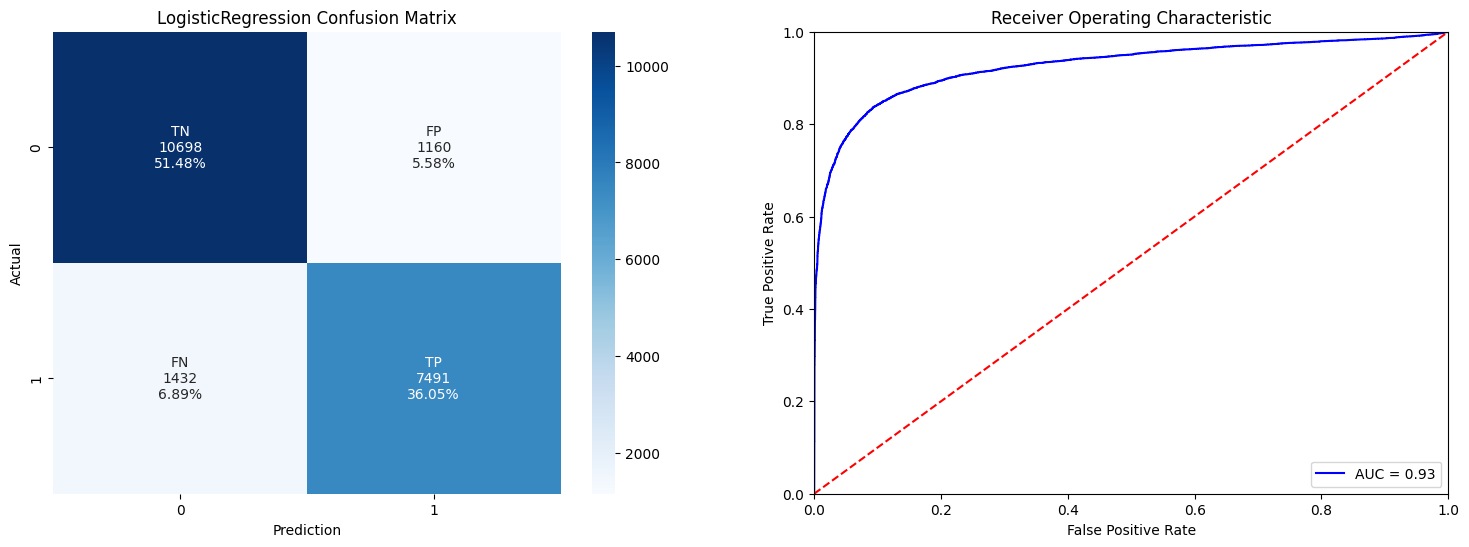

In [42]:
# Import the model
from sklearn.linear_model import LogisticRegression

#fit the model
model = LogisticRegression()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_test)


# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations

- The auc roc score is 92.65 %
- But this model is not working good with validation data. And also not predecting the True Positives.

		GAUSSIANNB MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.90      0.88     35308
              satisfaction       0.86      0.82      0.84     27034

                  accuracy                           0.86     62342
                 macro avg       0.86      0.86      0.86     62342
              weighted avg       0.86      0.86      0.86     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.90      0.88     11858
              satisfaction       0.86      0.82      0.84      8923

                  accuracy                           0.86     20781
                 macro avg       0.86      0.86      0.86     20781
              weighted avg       0.86      0.86      0.86     20781

Accuracy score for traing dataset 0.8636874017516282
Accuracy score for validation dataset 0.8641066358693037
ROC AUC Score : 

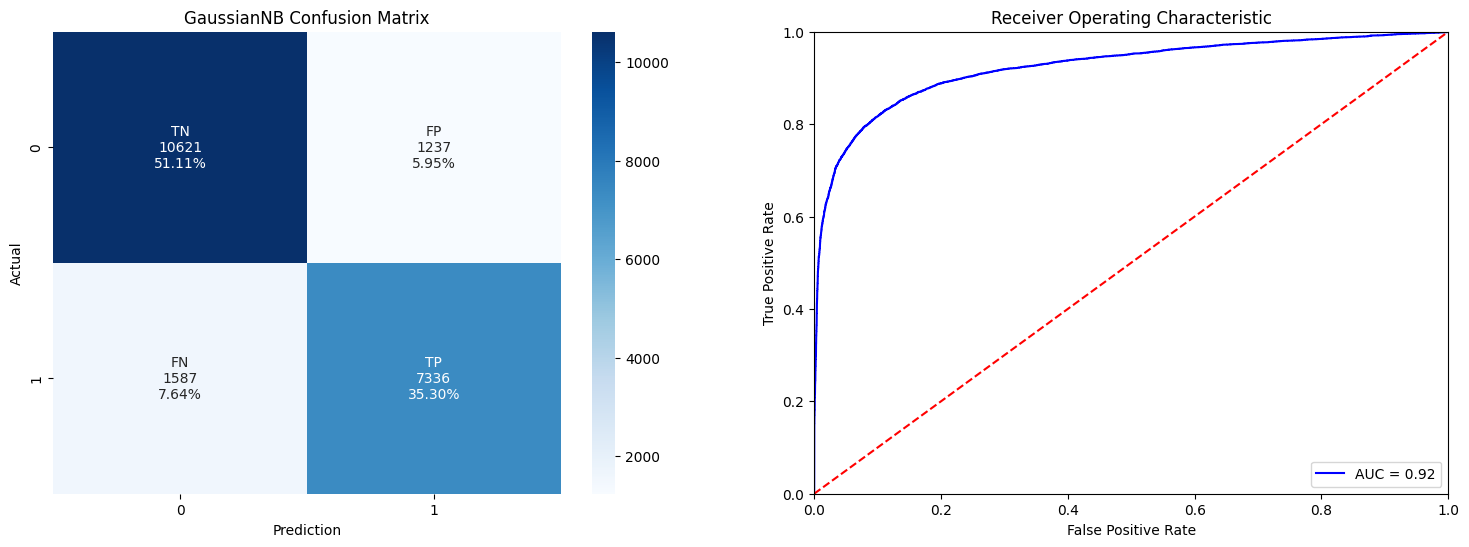

In [43]:
# import the model
from sklearn.naive_bayes import GaussianNB

#fit the model
model =GaussianNB()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations

- The ROC AUC score is 92.33%. But the Recall and F1 scores are low. Thus we can say our model is failing to predict the True Positives
- The Recall and F1 Score of the GaussianNB is more less than Logistic Regresssion.
- This model working better with validation data.

c:\Users\acer\anaconda3\envs\passenger\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


		LINEARSVC MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.91      0.89     35308
              satisfaction       0.87      0.83      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     11858
              satisfaction       0.87      0.84      0.85      8923

                  accuracy                           0.87     20781
                 macro avg       0.87      0.87      0.87     20781
              weighted avg       0.87      0.87      0.87     20781

Accuracy score for traing dataset 0.8734721375637612
Accuracy score for validation dataset 0.8743082623550359
ROC AUC Score : 9

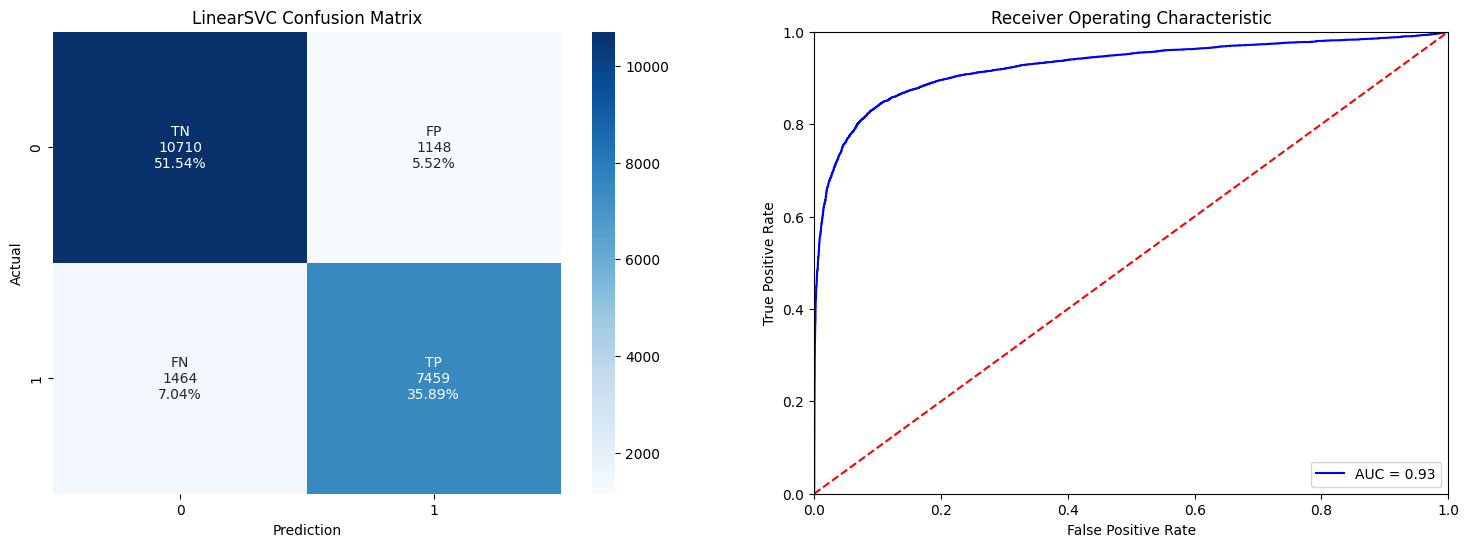

In [44]:
# import the model
from sklearn.svm import LinearSVC

#fit the model
model =LinearSVC()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations

- The ROC AUC score is 92.59%.
- But the Recall and F1 scores are low. Thus we can say our model is failing to predict the True Positives

		KNEIGHBORSCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.98      0.95     35308
              satisfaction       0.97      0.90      0.94     27034

                  accuracy                           0.95     62342
                 macro avg       0.95      0.94      0.94     62342
              weighted avg       0.95      0.95      0.95     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.96      0.94     11858
              satisfaction       0.95      0.88      0.91      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.92      0.92     20781
              weighted avg       0.93      0.93      0.93     20781

Accuracy score for traing dataset 0.9460075069776395
Accuracy score for validation dataset 0.9263750541359896
ROC AU

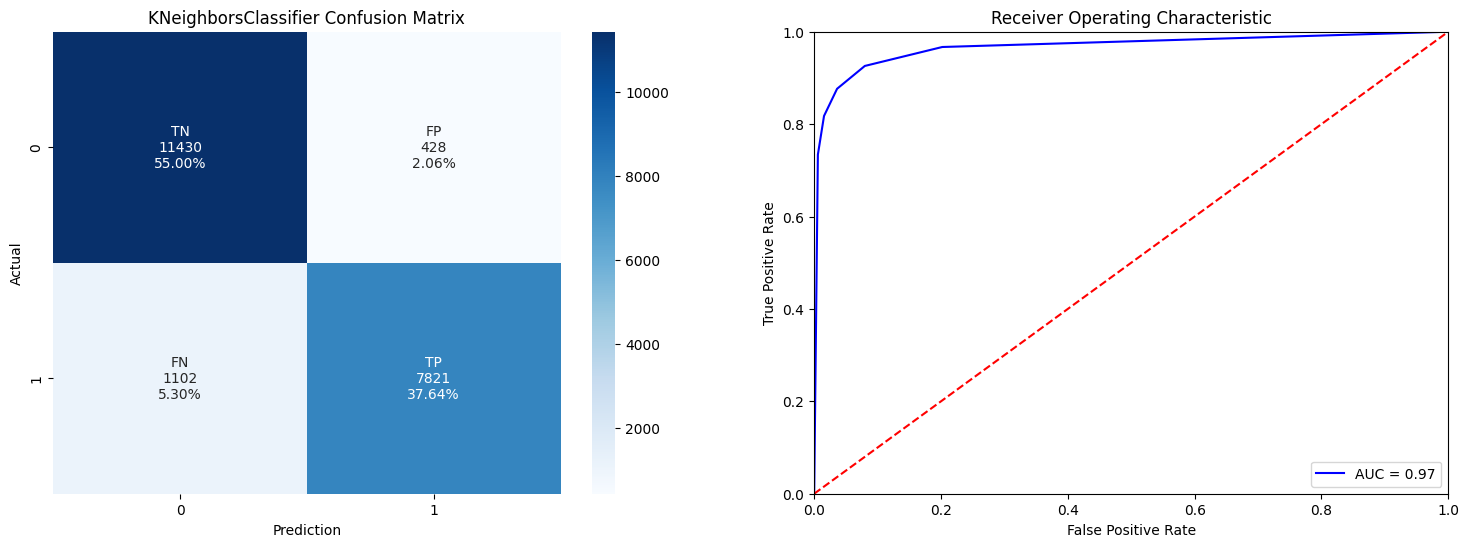

In [45]:
# import the model
from sklearn.neighbors import KNeighborsClassifier

#fit the model
model =KNeighborsClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 96.69%.
- The Recall and F1 scores are good.
- But model is failing to predict the True Positives.

		SGDCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.80      0.85     35308
              satisfaction       0.77      0.89      0.83     27034

                  accuracy                           0.84     62342
                 macro avg       0.84      0.84      0.84     62342
              weighted avg       0.85      0.84      0.84     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.79      0.85     11858
              satisfaction       0.76      0.90      0.83      8923

                  accuracy                           0.84     20781
                 macro avg       0.84      0.84      0.84     20781
              weighted avg       0.85      0.84      0.84     20781

Accuracy score for traing dataset 0.837781912675243
Accuracy score for validation dataset 0.8373514267840816
ROC AUC Score 

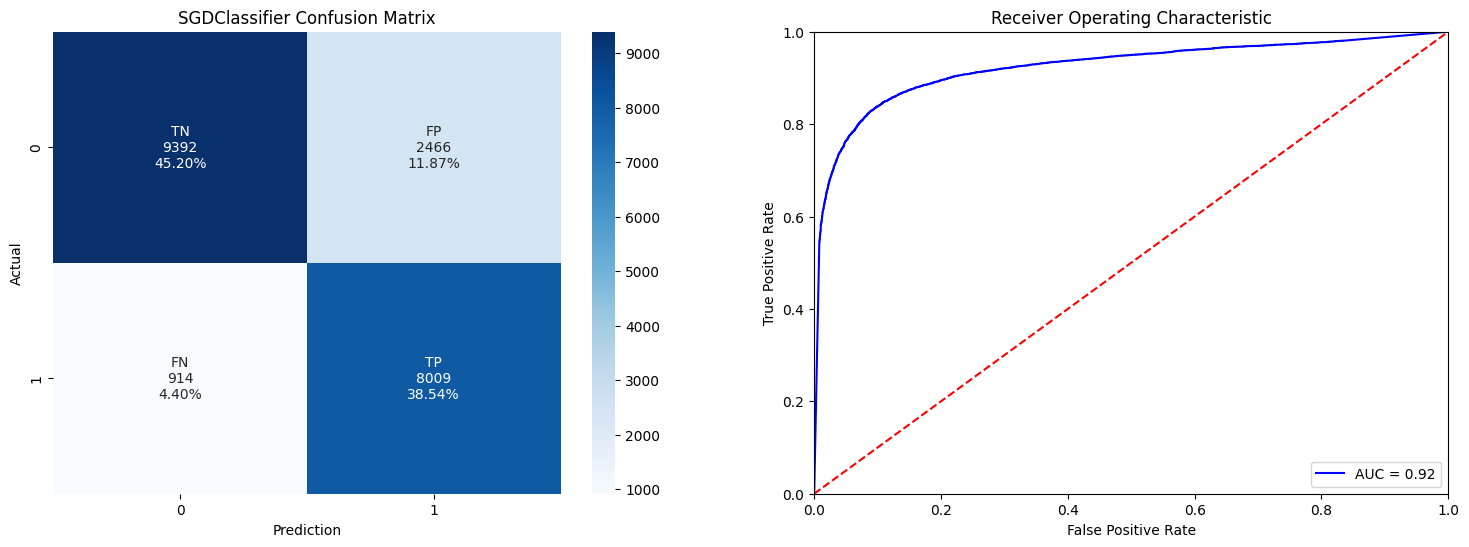

In [46]:
# import the model
from sklearn.linear_model import SGDClassifier

#fit the model
model =SGDClassifier(loss='modified_huber',n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 92.37%. But the Recall and F1 scores are low.

		DECISIONTREECLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.95      0.95     11858
              satisfaction       0.94      0.94      0.94      8923

                  accuracy                           0.95     20781
                 macro avg       0.95      0.95      0.95     20781
              weighted avg       0.95      0.95      0.95     20781

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9486069005341418
ROC AUC Score : 94.

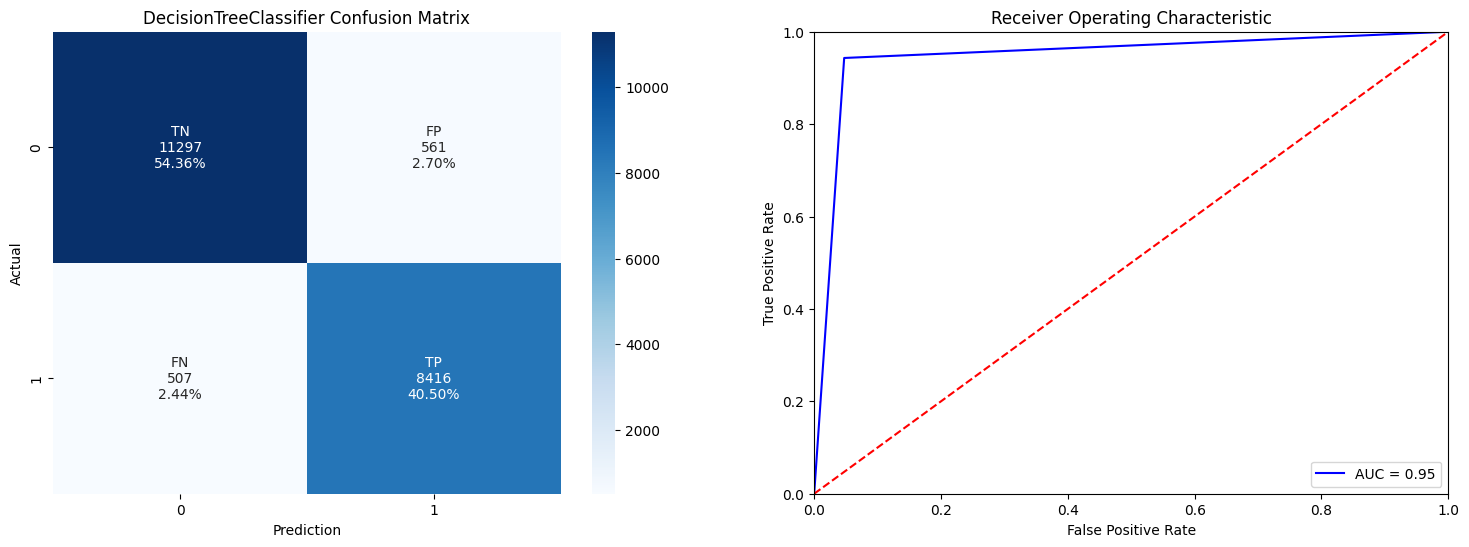

In [47]:
# import the model
from sklearn.tree import DecisionTreeClassifier

#fit the model
model =DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 94.79%.
- The Recall and F1 scores are good.
- But model will cause overfitting. as the accuracy score for training dataset is 1.

		RANDOMFORESTCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.95      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9609739666041095
ROC AUC Score : 99.

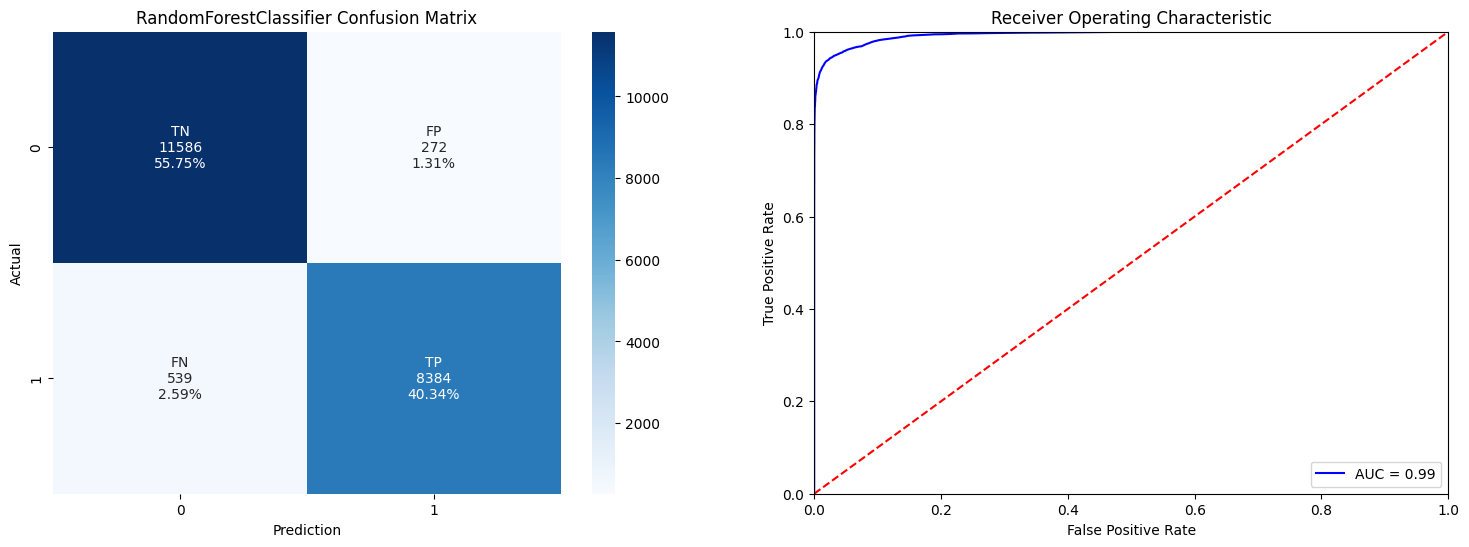

In [48]:
#import the model

from sklearn.ensemble import RandomForestClassifier

#fit the model
model =RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 99.37%.
- The Recall and F1 scores are good.
- But model can cause overfitting, as the accuracy score for training dataset is 1,
- But after hypertunning we can train this model model is working much better with the validation dataset set as compared to other trained model.

		ADABOOSTCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     35308
              satisfaction       0.92      0.91      0.92     27034

                  accuracy                           0.93     62342
                 macro avg       0.93      0.93      0.93     62342
              weighted avg       0.93      0.93      0.93     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.94      0.94     11858
              satisfaction       0.92      0.92      0.92      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.93      0.93     20781
              weighted avg       0.93      0.93      0.93     20781

Accuracy score for traing dataset 0.9275929549902152
Accuracy score for validation dataset 0.9282517684423272
ROC AUC 

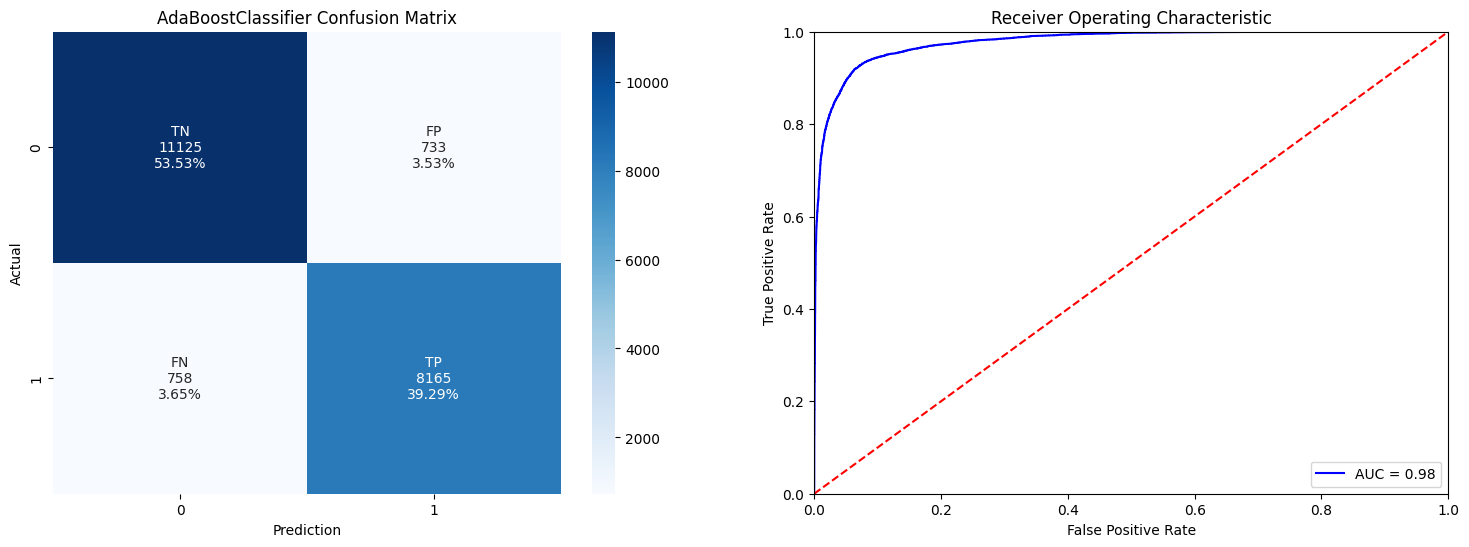

In [49]:
#import the model

from sklearn.ensemble import AdaBoostClassifier
#fit the model
model =AdaBoostClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 97.74%.
- The Recall and F1 scores are good but comapritively lower than the random forest.

		GRADIENTBOOSTINGCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     35308
              satisfaction       0.95      0.92      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.94      0.94      0.94     62342
              weighted avg       0.94      0.94      0.94     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     11858
              satisfaction       0.94      0.92      0.93      8923

                  accuracy                           0.94     20781
                 macro avg       0.94      0.94      0.94     20781
              weighted avg       0.94      0.94      0.94     20781

Accuracy score for traing dataset 0.942735234673254
Accuracy score for validation dataset 0.9418218565035369
R

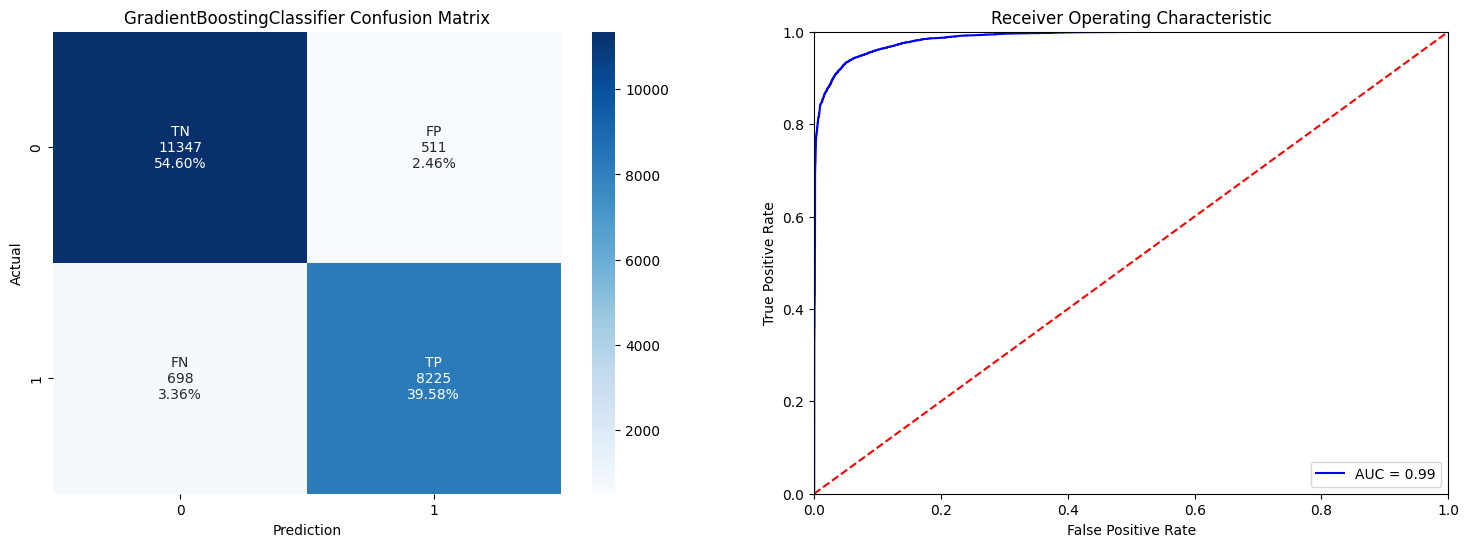

In [50]:
#import the model

from sklearn.ensemble import GradientBoostingClassifier

#fit the model
model =GradientBoostingClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 98.71%.
- The Recall and F1 scores are good.
- We can choose this datadset to train our model.

		XGBCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.97      0.99      0.98     35308
              satisfaction       0.99      0.97      0.98     27034

                  accuracy                           0.98     62342
                 macro avg       0.98      0.98      0.98     62342
              weighted avg       0.98      0.98      0.98     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.95      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 0.9791472843347984
Accuracy score for validation dataset 0.9634281314662432
ROC AUC Score

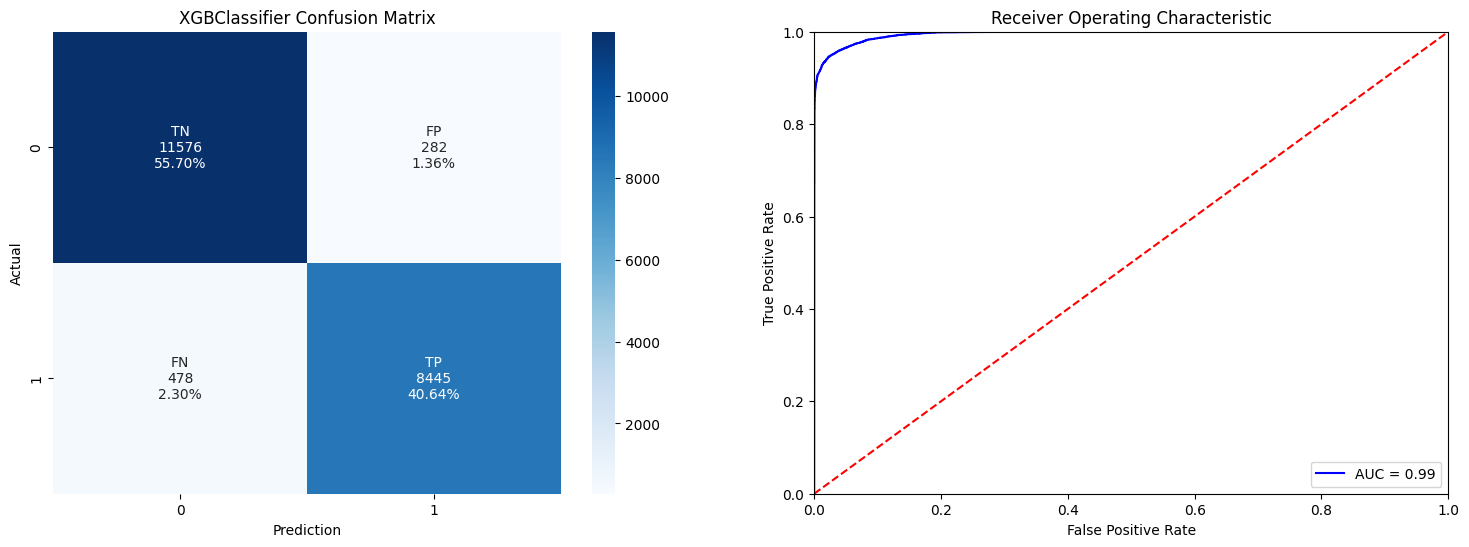

In [51]:
#import the model

from xgboost import XGBClassifier

#fit the model
model =XGBClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 99.51%.slightly higher than gradient Boosting.
- The Recall and F1 scores are good.
- We can choose this datadset to train our model. And can also improve our model with Hyperparameter tunning

In [53]:
!pip install lightgbm

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)


[LightGBM] [Info] Number of positive: 27034, number of negative: 35308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 62342, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433640 -> initscore=-0.267014
[LightGBM] [Info] Start training from score -0.267014
		LGBMCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     35308
              satisfaction       0.98      0.94      0.96     27034

                  accuracy                           0.97     62342
                 macro avg       0.97      0.96      0.97     62342
              weighted avg       0.97      0.97      0.97     

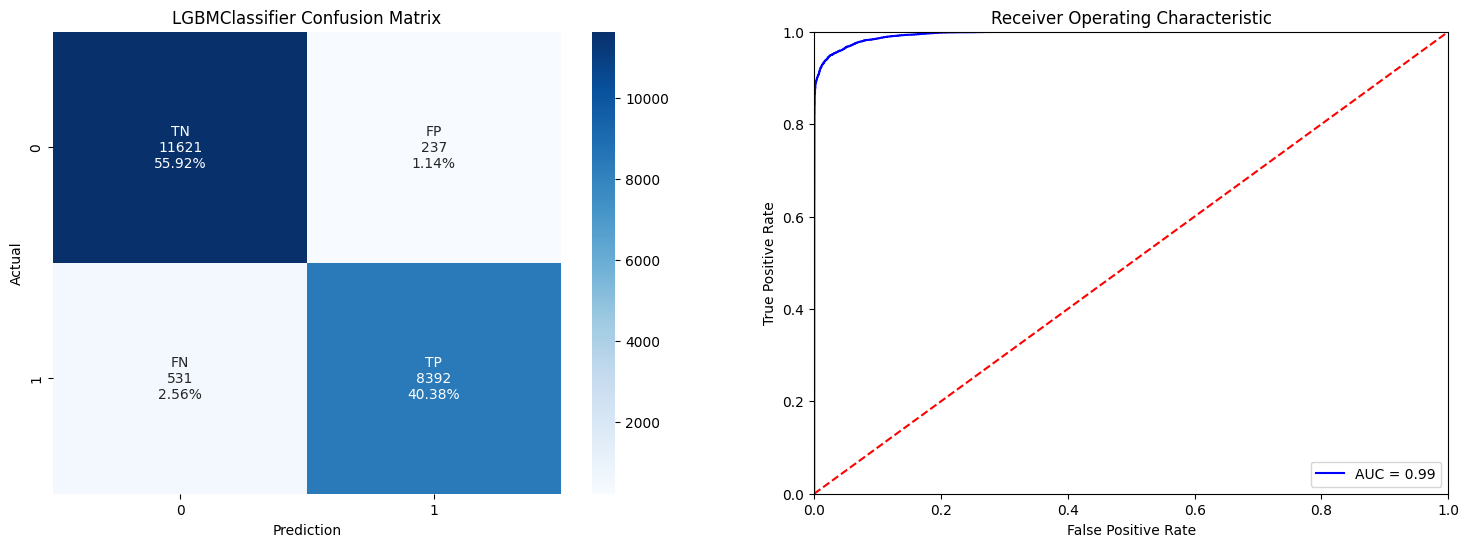

In [54]:
#import the model

import lightgbm as lgb

#fit the model
model =lgb.LGBMClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- this model is performing best with our Dataset.
- The ROC AUC score is 99.49%.
- The Recall and F1 scores are Very good.
- We can choose this datadset to train our model.